## Import required Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Load data from csv file

In [3]:
df=pd.read_csv('./data.csv')
df.shape

(1800, 12)

In [4]:
df.head(3)

,title,score,id,body,author,flair,url,comms_num,created,comment,authors,combined_features
0,"Lost my Job, Sick Mother and Paralysed Dad, In...",1042,g014wc,Hi....It's really tough time for everyone. I r...,sanand_satwik,AskIndia,https://www.reddit.com/r/india/comments/g014wc...,132,1.586742e+09,I'm a freelancer. Don't listen to the idiots ...,hashedram diabapp xataari Aashayrao sarcrasti...,"Lost my Job, Sick Mother and Paralysed Dad, In..."
1,Why does the government come with a begging bo...,647,fxofyu,"We have floods, terrorist attacks, famines due...",TWO-WHEELER-MAFIA,AskIndia,https://www.reddit.com/r/india/comments/fxofyu...,205,1.586448e+09,I don't understand why they don't use money f...,Kinky-Monk ak32009 fools_eye None DwncstSheep...,Why does the government come with a begging bo...
2,Mother's condition is going worse due to hepat...,756,g0zlly,"Hi folks, I really appreciate the warm respons...",sanand_satwik,AskIndia,https://www.reddit.com/r/india/comments/g0zlly...,92,1.586871e+09,If anyone knows who is influential on Twitter...,AlternativeDrop6 TheRobotsHaveCome lanky32 pl...,Mother's condition is going worse due to hepat...


In [4]:
#Removing all rows of flairs with frequency less than 10
df=df.groupby('flair').filter(lambda x : len(x)>10)

In [6]:
flairs= df.groupby(['flair'])

In [7]:
flairs['flair'].count()

flair
AskIndia              200
Business/Finance      200
Food                  200
Non-Political         200
Photography           200
Policy/Economy        200
Politics              200
Science/Technology    200
Sports                200
Name: flair, dtype: int64

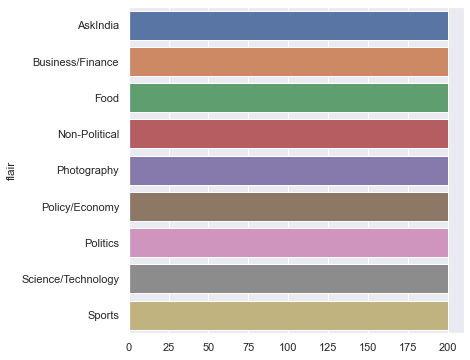

In [8]:
flair_count=flairs['flair'].count()
plt.figure(0,figsize=(6,6))
sns.barplot(flair_count.values, flair_count.index)

## Comment Count in each Category

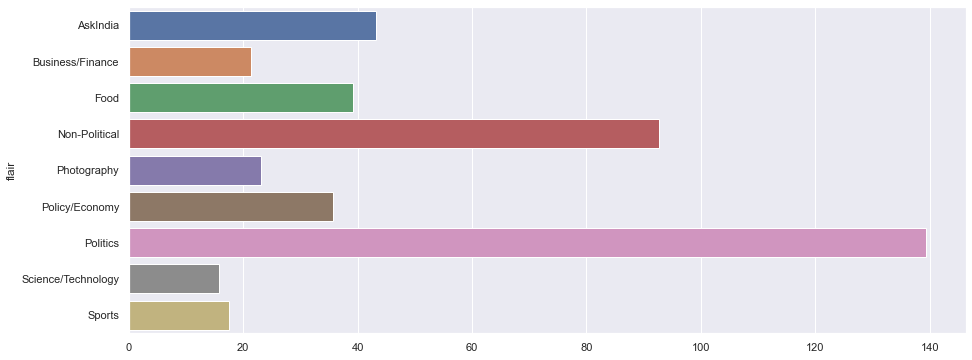

In [11]:
comment_count=flairs['comms_num'].mean()
plt.figure(2,figsize=(15,6))
splot=sns.barplot(comment_count.values, comment_count.index)
# splot.set(xscale="log")
plt.show()

## Average word count for all posts in each flair

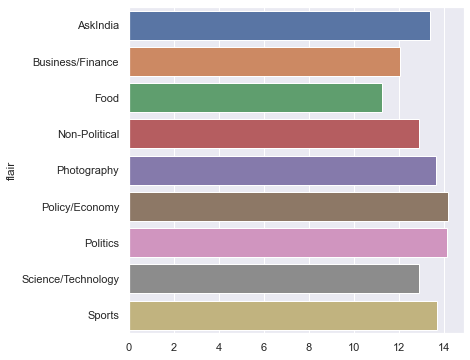

In [12]:
# Words count in title
df['Title_wc']=df['title'].apply(lambda x:len(list(str(x).split())))
plt.figure(3,figsize=(6,6))
flairs= df.groupby(['flair'])['Title_wc'].mean()
sns.barplot(flairs.values, flairs.index)

## Top words in all data

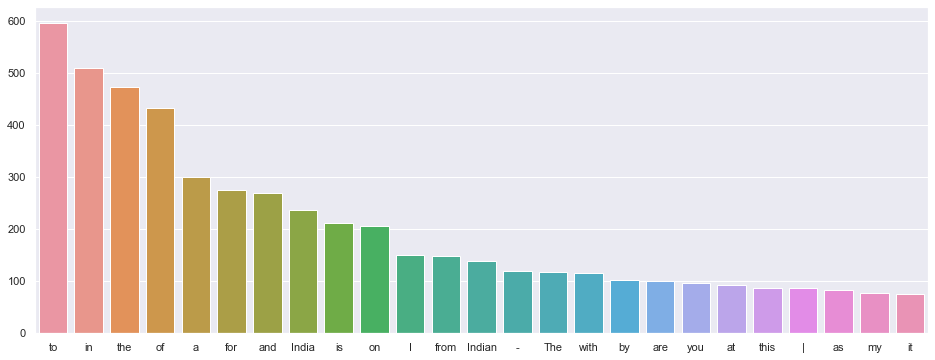

In [13]:
# Top 50 most used words in title
all_word_count=df['title'].str.split(expand=True).unstack().value_counts()
plt.figure(3,figsize=(16,6))
sns.barplot(all_word_count[:25].index, all_word_count[:25].values)

## Top words in each flair category

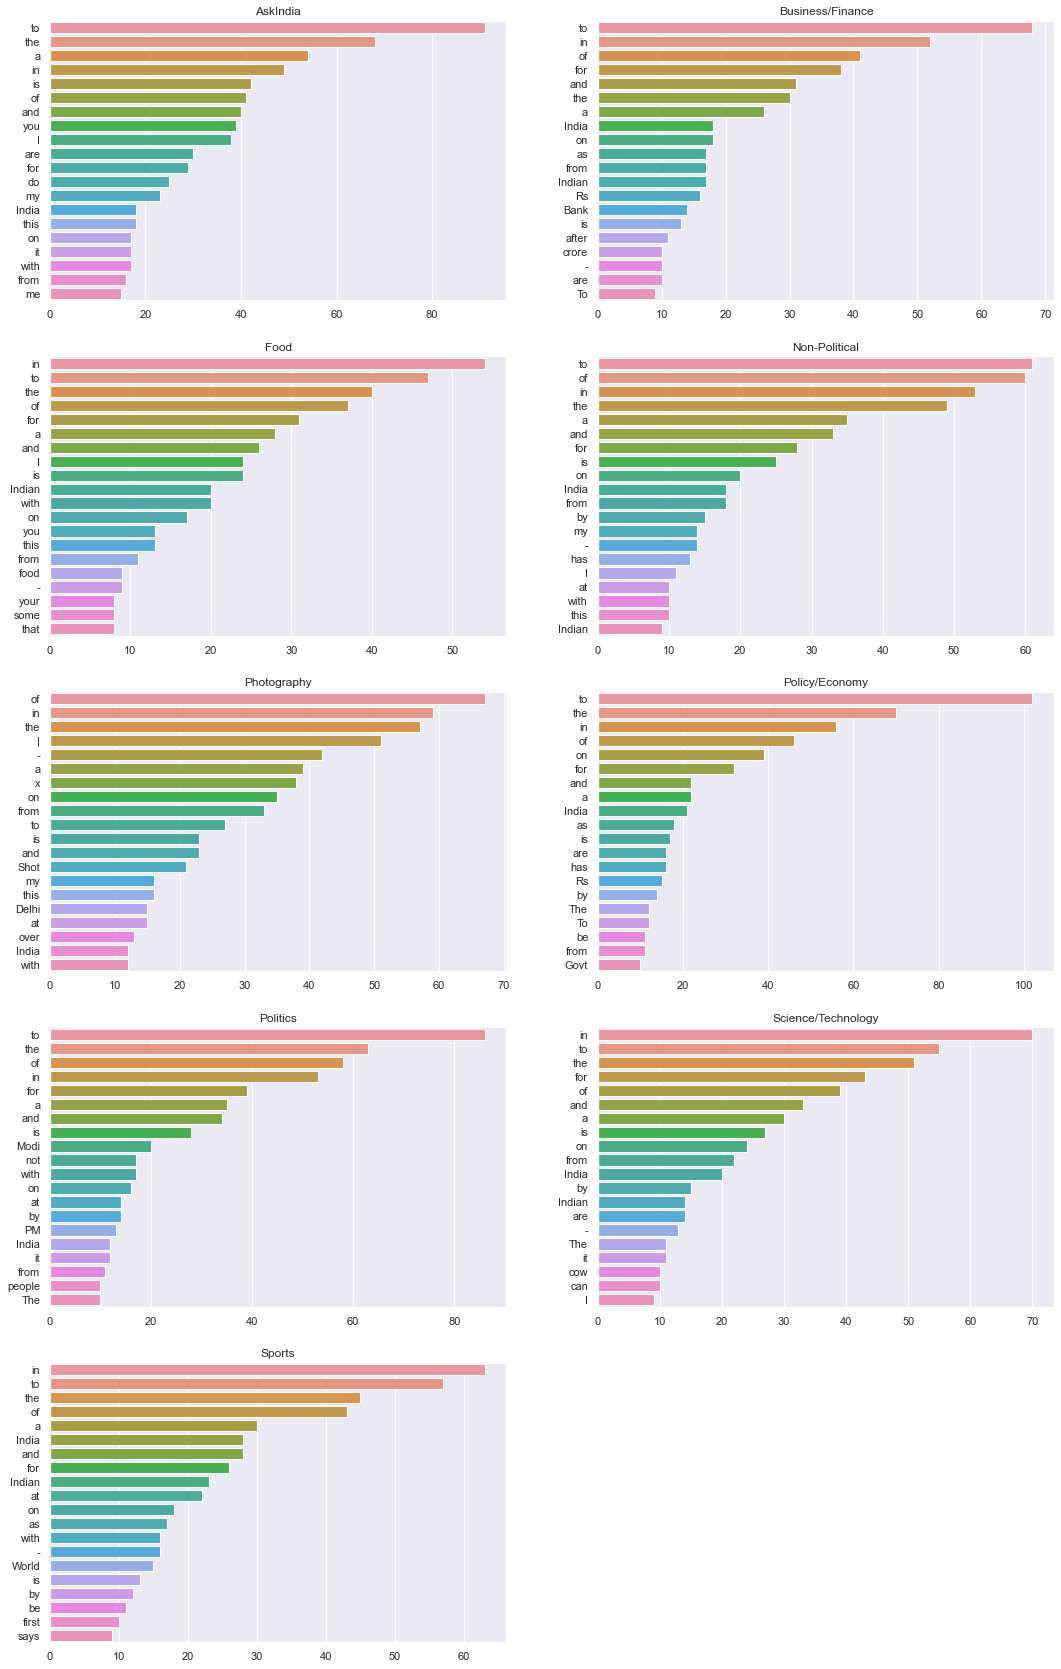

In [14]:
flair_all_words=df.groupby('flair').agg({'title':sum})
plt.figure(0,figsize=(18,36))
for i in range(len(flair_all_words)):
    plt.subplot(6,2,i+1)
    plt.title(flair_all_words.index[i])
    ix,iy= np.unique(str(flair_all_words['title'][i]).split(),return_counts=True)
    iy_ind=np.argsort(-iy)
    sns.barplot(iy[iy_ind[:20]],ix[iy_ind[:20]])

plt.show()
#     break